In [31]:
from awes_ekf.setup.tether import Tether, TetherInput
from awes_ekf.setup.kite import Kite
from awes_ekf.setup.kcu import KCU
from awes_ekf.setup.settings import ObservationData
import numpy as np

kite_dict = {
    'model_name': 'kite',
    'mass': 1.0,
    'area': 1.0,
    'span': 1.0,
}

tether_dict = {
    'material_name': 'Dyneema-SK78',
    'diameter': 0.014,
    'n_elements': 30,
}

kcu_dict = {
    'length': 1,
    'diameter': 0.48,
    'mass': 27.6,
    'distance_kcu_kite': 11.5,
    'total_length_bridle_lines': 96,
    'diameter_bridle_lines': 0.0025,
}



kite = Kite(**kite_dict)
kcu = KCU(**kcu_dict)

obsData = ObservationData()



tether = Tether(kite, kcu, obsData, **tether_dict)

tether_input = TetherInput(
    kite_pos = np.array([0,0,100]),
    kite_vel = np.array([10,0,0]),
    tether_force = 1000,
    tether_length = 180,
    tether_elevation = 90,
    tether_azimuth = 0,
    wind_vel= np.array([-20,0,0])
)

[-0.000185517, 5.38763e-17, 99.9999]
89.2606

[[0, 0, 0], 
 [-0.506774, 1.71815e-18, 2.93187], 
 [-1.00357, 3.42973e-18, 5.86545], 
 [-1.48642, 5.13513e-18, 8.80135], 
 [-1.95233, 6.83464e-18, 11.74], 
 [-2.39874, 8.52843e-18, 14.6817], 
 [-2.82337, 1.02166e-17, 17.6266], 
 [-3.22405, 1.18994e-17, 20.5748], 
 [-3.59873, 1.35767e-17, 23.5265], 
 [-3.94544, 1.52486e-17, 26.4815], 
 [-4.26225, 1.69151e-17, 29.44], 
 [-4.5473, 1.85761e-17, 32.4016], 
 [-4.79878, 2.02316e-17, 35.3663], 
 [-5.01489, 2.18814e-17, 38.3338], 
 [-5.19394, 2.35254e-17, 41.3038], 
 [-5.33425, 2.51635e-17, 44.2758], 
 [-5.43424, 2.67953e-17, 47.2495], 
 [-5.49237, 2.84207e-17, 50.2243], 
 [-5.50723, 3.00395e-17, 53.1996], 
 [-5.47748, 3.16513e-17, 56.1748], 
 [-5.40188, 3.32558e-17, 59.1492], 
 [-5.27934, 3.48528e-17, 62.122], 
 [-5.10888, 3.64418e-17, 65.0925], 
 [-4.88966, 3.80226e-17, 68.0598], 
 [-4.62099, 3.95948e-17, 71.023], 
 [-4.30233, 4.11581e-17, 73.9812], 
 [-3.93331, 4.2712e-17, 76.9336], 
 [-3.5137, 4

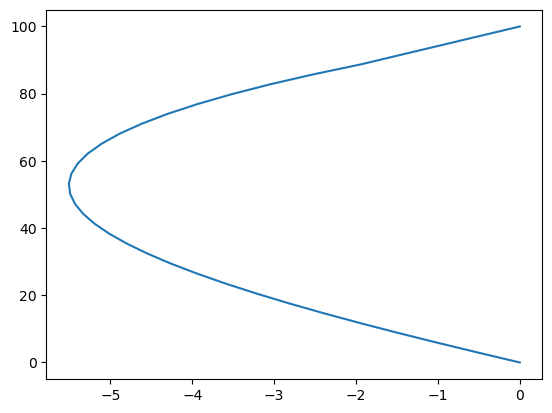

In [32]:
tether_input = tether.solve_tether_shape(tether_input)

args = tether_input.create_input_tuple(obsData)

print(tether.kite_position(*args))
print(tether.tether_length(*args))
print(tether.positions(*args))


positions = np.array(tether.positions(*args))
import matplotlib.pyplot as plt
plt.plot(positions[:,0], positions[:,2])